# Figures & Example Data Usage
from "Characterizing collective physical distancing in the U.S. during the first nine months of the COVID-19 pandemic" (2024) by Brennan Klein, Timothy LaRock, Stefan McCabe, Leo Torres, Lisa Friedland, Maciej Kos, Filippo Privitera, Brennan Lake, Moritz U.G. Kraemer, John S. Brownstein, Richard Gonzalez, David Lazer, Tina Eliassi-Rad, Samuel V. Scarpino, Alessandro Vespignani, & Matteo Chinazzi

In [1]:
import pandas as pd

import numpy as np

import itertools as it

import datetime as dt

from scipy.stats import linregress

import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib as mpl
import matplotlib.patheffects as path_effects
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable


plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rc('axes', axisbelow=True)

In [2]:
# primary dataset
df_w = pd.read_csv('../data/publication_data_weighted.csv')

# useful data frames and dictionary for plotting
DATE_DF = df_w[['date','day']].drop_duplicates().reset_index().iloc[:,1:]
DATERANGE = DATE_DF['date'].values

date_dict = {DATERANGE[i]:i for i in range(len(DATERANGE))}
date_dict['2020-02-01'] = -1
date_dict['2020-11-01'] = 305

In [3]:
KEY_DATES = pd.read_csv('../data/key_dates_allresolutions.tsv', sep='\t', dtype={'location_id':str})

In [4]:
initial_reopening = {'ak': '2020-04-24', 'al': '2020-04-30', 'ar': '2020-05-06', 'az': '2020-05-08',
                     'ca': '2020-05-25', 'co': '2020-04-27', 'ct': '2020-05-20', 'dc': '2020-05-29',
                     'de': '2020-05-31', 'fl': '2020-05-04', 'ga': '2020-04-24', 'hi': '2020-05-07',
                     'ia': '2020-05-01', 'id': '2020-05-01', 'il': '2020-05-29', 'in': '2020-05-04',
                     'ks': '2020-05-04', 'ky': '2020-05-20', 'la': '2020-05-15', 'ma': '2020-05-18',
                     'md': '2020-05-15', 'me': '2020-05-01', 'mi': '2020-06-01', 'mn': '2020-05-18',
                     'mo': '2020-05-04', 'ms': '2020-04-27', 'mt': '2020-04-26', 'nc': '2020-05-08',
                     'nd': '2020-05-01', 'ne': '2020-05-04', 'nh': '2020-05-11', 'nj': '2020-06-09',
                     'nm': '2020-05-16', 'nv': '2020-05-09', 'ny': '2020-05-29', 'oh': '2020-05-12',
                     'ok': '2020-04-24', 'or': '2020-05-15', 'pa': '2020-05-15', 'ri': '2020-05-09',
                     'sc': '2020-04-20', 'sd': '2020-04-28', 'tn': '2020-04-27', 'tx': '2020-05-01',
                     'ut': '2020-05-01', 'va': '2020-05-15', 'vt': '2020-05-15', 'wa': '2020-05-26',
                     'wi': '2020-05-13', 'wv': '2020-05-04', 'wy': '2020-05-01'}

all_state_names = {'ak': 'Alaska', 'al': 'Alabama', 'ar': 'Arkansas',
                   'as': 'American Samoa',  'az': 'Arizona',
                   'ca': 'California', 'co': 'Colorado',
                   'ct': 'Connecticut', 'dc': 'District of Columbia',
                   'de': 'Delaware', 'fl': 'Florida', 'ga': 'Georgia',
                   'gu': 'Guam', 'hi': 'Hawaii', 'ia': 'Iowa',
                   'id': 'Idaho', 'il': 'Illinois', 'in': 'Indiana',
                   'ks': 'Kansas', 'ky': 'Kentucky', 'la': 'Louisiana',
                   'ma': 'Massachusetts', 'md': 'Maryland', 'me': 'Maine',
                   'mi': 'Michigan', 'mn': 'Minnesota', 'mo': 'Missouri',
                   'mp': 'Northern Mariana Islands', 'ms': 'Mississippi',
                   'mt': 'Montana', 'nc': 'North Carolina',
                   'nd': 'North Dakota', 'ne': 'Nebraska',
                   'nh': 'New Hampshire', 'nj': 'New Jersey',
                   'nm': 'New Mexico', 'nv': 'Nevada', 'ny': 'New York',
                   'oh': 'Ohio', 'ok': 'Oklahoma', 'or': 'Oregon',
                   'pa': 'Pennsylvania', 'pr': 'Puerto Rico',
                   'ri': 'Rhode Island', 'sc': 'South Carolina',
                   'sd': 'South Dakota', 'tn': 'Tennessee', 'tx': 'Texas',
                   'ut': 'Utah', 'va': 'Virginia',
                   'vi': 'Virgin Islands', 'vt': 'Vermont',
                   'wa': 'Washington', 'wi': 'Wisconsin',
                   'wv': 'West Virginia', 'wy': 'Wyoming'}

all_state_ids = {'01': 'al', '02': 'ak', '04': 'az', '05': 'ar',
                 '06': 'ca', '08': 'co', '09': 'ct', '10': 'de',
                 '11': 'dc', '12': 'fl', '13': 'ga', '15': 'hi',
                 '16': 'id', '17': 'il', '18': 'in', '19': 'ia',
                 '20': 'ks', '21': 'ky', '22': 'la', '23': 'me',
                 '24': 'md', '25': 'ma', '26': 'mi', '27': 'mn',
                 '28': 'ms', '29': 'mo', '30': 'mt', '31': 'ne',
                 '32': 'nv', '33': 'nh', '34': 'nj', '35': 'nm',
                 '36': 'ny', '37': 'nc', '38': 'nd', '39': 'oh',
                 '40': 'ok', '41': 'or', '42': 'pa', '44': 'ri',
                 '45': 'sc', '46': 'sd', '47': 'tn', '48': 'tx',
                 '49': 'ut', '50': 'vt', '51': 'va', '53': 'wa',
                 '54': 'wv', '55': 'wi', '56': 'wy', "60": 'as',
                 "66": 'gu', "72": 'pr', '78': 'vi', '69': 'mp'}

all_ids_state = {j:i for i,j in all_state_ids.items()}

# Figure 1

In [5]:
fig1_cols = ['mobility_per_home_user_percent',
             'commuters_per_home_user_percent',
             'inter_region_mobility_percent',
             'edge_minutes_15min_durations_percent',
             'distinct_edges_15min_durations_per_distinct_user_percent']

In [6]:
resolution = 'national'
res_df = df_w.loc[(df_w['location_resolution']==resolution)].copy().reset_index().iloc[:,1:]

In [7]:
wid = 7

xvals = DATE_DF.index.values
yvals_totaledges_15_r = res_df['edge_minutes_15min_durations_percent'].rolling(window=wid).mean().values
yvals_distinctedges_15_r = res_df['distinct_edges_15min_durations_per_distinct_user_percent'].rolling(window=wid).mean().values
yvals_mobility_r = res_df['mobility_per_home_user_percent'].rolling(window=wid).mean().values
yvals_commmute_r = res_df['commuters_per_home_user_percent'].rolling(window=wid).mean().values
yvals_intercsa_r = res_df['inter_region_mobility_percent'].rolling(window=wid).mean().values

yvals_totaledges_15 = res_df['edge_minutes_15min_durations_percent'].values
yvals_distinctedges_15 = res_df['distinct_edges_15min_durations_per_distinct_user_percent'].values
yvals_mobility = res_df['mobility_per_home_user_percent'].values
yvals_commmute = res_df['commuters_per_home_user_percent'].values
yvals_intercsa = res_df['inter_region_mobility_percent'].values

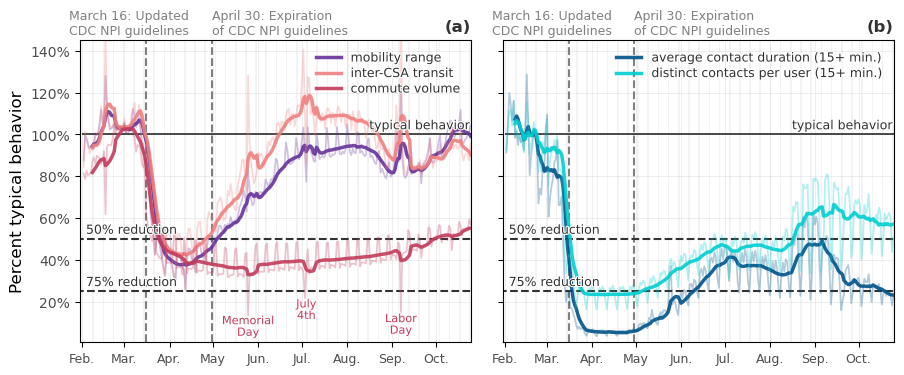

In [8]:
xtx = ['2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01',
       '2020-07-01','2020-08-01','2020-09-01','2020-10-01','2020-11-01']
xtxl = ['Feb.', 'Mar.', 'Apr.', 'May', 'Jun.','Jul.', 'Aug.', 'Sep.','Oct.','Nov.']

national_emergency = '2020-03-13'
updated_guidelines = '2020-03-16'
expired_guidelines = '2020-04-30'
national_emergency_x = np.where(np.array(DATERANGE)==national_emergency)[0][0]
updated_guidelines_x = np.where(np.array(DATERANGE)==updated_guidelines)[0][0]
expired_guidelines_x = np.where(np.array(DATERANGE)==expired_guidelines)[0][0]

textcol = '.5'
vlinecol = '.5'

cols = {'unique_contacts':'mediumaquamarine',
        'colocation_events':'#00538a',
        'distinct_edges':'darkturquoise',
        'commute_volume':'#c23b5a',
        'mobility_range':'rebeccapurple',
        'inter_csa':'lightcoral'
       }

fs = 9
ms = 8
lw = 2.5
fig, ax = plt.subplots(1,2,figsize=(10.505,4.0),dpi=100,sharey=True)
plt.subplots_adjust(wspace=0.08)

ax[0].plot(xvals,yvals_mobility,'-',linewidth=lw/2,alpha=0.3,color=cols['mobility_range'])
ax[0].plot(xvals,yvals_mobility_r,'-',linewidth=lw,alpha=0.9,color=cols['mobility_range'],
        label='mobility range')
ax[0].plot(xvals,yvals_intercsa,'-',linewidth=lw/2,alpha=0.3,color=cols['inter_csa'])
ax[0].plot(xvals,yvals_intercsa_r,'-',linewidth=lw,alpha=0.9,color=cols['inter_csa'],
        label='inter-CSA transit')
ax[0].plot(xvals,yvals_commmute,'-',linewidth=lw/2,alpha=0.3,color=cols['commute_volume'])
ax[0].plot(xvals,yvals_commmute_r,'-',linewidth=lw,alpha=0.9,color=cols['commute_volume'],
        label='commute volume')
ax[1].plot(xvals,yvals_totaledges_15,'-',linewidth=lw/2,alpha=0.3,color=cols['colocation_events'])
ax[1].plot(xvals,yvals_totaledges_15_r,'-',linewidth=lw,alpha=0.9,color=cols['colocation_events'],
        label='average contact duration (15+ min.)')
ax[1].plot(xvals,yvals_distinctedges_15,'-',linewidth=lw/2,alpha=0.3,color=cols['distinct_edges'])
ax[1].plot(xvals,yvals_distinctedges_15_r,'-',linewidth=lw,alpha=0.9,color=cols['distinct_edges'],
        label='distinct contacts per user (15+ min.)')

t1 = ax[0].text(date_dict['2020-05-25'],0.13,'Memorial\nDay', ha='center', va='top',
                color=cols['commute_volume'],fontsize=fs*0.9)
t2 = ax[0].text(date_dict['2020-07-04'],0.21,'July\n4th', ha='center', va='top',
                color=cols['commute_volume'],fontsize=fs*0.9)
t3 = ax[0].text(date_dict['2020-09-07'],0.14,'Labor\nDay', ha='center', va='top',
                color=cols['commute_volume'],fontsize=fs*0.9)

for text in [t1,t2,t3]:
    text.set_path_effects([path_effects.Stroke(linewidth=1.0, foreground='w'),
                           path_effects.Normal()])

ymin = 0.005
ymax = 1.450

ax[0].set_ylabel('Percent typical behavior', fontsize='large')
letts = ['(a)','(b)']
for ai,a in enumerate(fig.axes):
    a.text(expired_guidelines_x, ymax*1.01, "April 30: Expiration\nof CDC NPI guidelines",
                fontsize=fs, horizontalalignment='left', verticalalignment='bottom',color=textcol)
    a.text(updated_guidelines_x-12, ymax*1.01, "March 16: Updated\nCDC NPI guidelines",
                fontsize=fs, horizontalalignment='center', verticalalignment='bottom',color=textcol)

    for wi, wnd in enumerate(DATE_DF['day'].tolist()):
        if wnd == 'Saturday':
            a.fill_between([wi-0.05,wi+1.05], ymin, ymax, linewidth=0, color='.85', alpha=0.3, zorder=0)

    a.vlines(expired_guidelines_x, ymin, ymax, color=vlinecol, linestyle='--')
    a.vlines(updated_guidelines_x, ymin, ymax, color=vlinecol, linestyle='--')

    a.grid(color='.7',alpha=0.3,linewidth=0.5)
    l = a.legend(ncol=1,loc=1,fontsize=fs,framealpha=0,labelspacing=0.2)
    for text in l.get_texts():
        text.set_color('.2')
        text.set_path_effects([path_effects.Stroke(linewidth=1.5, foreground='w'),
                           path_effects.Normal()])
        
    a.set_xticks([date_dict[i] for i in xtx])
    a.set_xticklabels(xtxl, fontsize=fs)
    a.tick_params(which='both', labelcolor='.3')

    a.set_xlim(-2.5,xvals[-1]+0.5)
    a.set_ylim(ymin,ymax)
    a.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))
    a.text(xvals[-1], ymax*1.02, letts[ai], fontsize='large',fontweight='bold',
            horizontalalignment='right', verticalalignment='bottom',color='.2')

    text1 = a.text(xvals[1]+0.6, 0.51, "50% reduction", fontsize=fs, color='.2',
               horizontalalignment='left', verticalalignment='bottom')
    a.hlines(0.50, -5, xvals[-1]+3, linestyle='--',  color='.2')
    text2 = a.text(xvals[1]+0.6, 0.26, "75% reduction", fontsize=fs, color='.2',
               horizontalalignment='left', verticalalignment='bottom')
    a.hlines(0.25, -5, xvals[-1]+3, linestyle='--',  color='.2')
    text3 = a.text(xvals[-1]-0.5, 1.01, "typical behavior", fontsize=fs,
            horizontalalignment='right', verticalalignment='bottom', color='.2')
    a.hlines(1,-1,xvals[-1]+1, linestyle='-',color='.2', linewidth=1.25)
    for text in [text1,text2,text3]:
        text.set_path_effects([path_effects.Stroke(linewidth=1.5, foreground='w'),
                           path_effects.Normal()])

plt.savefig('../figs/pngs/percent_daily_contacts_nationally.png', dpi=425, bbox_inches='tight')
plt.savefig('../figs/pdfs/percent_daily_contacts_nationally.pdf', bbox_inches='tight')

plt.show()

# Figure 2

### Note: we import a tl_2017_us_county shapefile that must be downloaded separately
https://catalog.data.gov/dataset/tiger-line-shapefile-2017-nation-u-s-current-county-and-equivalent-national-shapefile

In [9]:
import geopandas as gpd

# county-level shapefile to plot activity on for maps
county_shp = gpd.read_file('../data/tl_2017_us_county/')
dat_shp = county_shp.loc[~(county_shp['STATEFP'].isin(
    ['78','60','72','66','02','15','69']))].copy()
dat_shp = dat_shp.rename(columns={'GEOID':'location_id'})

In [10]:
# state level time series from January to September
st_dash = pd.read_csv('../data/fig2_combined_measure_state.csv', dtype={'location_id':str})
DATERANGE = sorted(st_dash.date.unique())
PLOTDATES = list(range(len(DATERANGE)))
date_dict2 = dict(zip(DATERANGE,PLOTDATES))
states = st_dash.name.unique()

# county-level activity averages for the four periods studied
wdf = pd.read_csv('../data/fig2_combined_measure_countylevel_fourperiods.csv', dtype={'location_id':str})

In [11]:
state_collapsed = []
for i in states:
    state_collapsed.append(st_dash.loc[st_dash.name==i]['collapsed_measure'].tolist())

# make dictionaries of important dates at the state level
state_info = st_dash[['name', 'state_of_emergency', 'shelter_in_place',
                      'days_since_1st_case', 'date_of_1st_case']].drop_duplicates()
state_info = state_info.loc[state_info['days_since_1st_case']==0]
state_info = state_info.sort_values('state_of_emergency').reset_index().iloc[:,1:]

first_date_df = state_info.loc[state_info.days_since_1st_case==0][['name','date_of_1st_case']]
first_date_dict = dict(zip(first_date_df['name'],first_date_df['date_of_1st_case']))

emerg_date_df = state_info.loc[state_info.days_since_1st_case==0][['name','state_of_emergency']]
emerg_date_dict = dict(zip(emerg_date_df['name'],emerg_date_df['state_of_emergency']))

shelt_date_df = state_info.loc[state_info.days_since_1st_case==0][['name','shelter_in_place']]
shelt_date_dict = dict(zip(shelt_date_df['name'],shelt_date_df['shelter_in_place']))

min_dicts = {i:[] for i in states}
ndays = 7
for i in states:
    st_i_df = st_dash.loc[st_dash.name==i]
    for ix in range(len(st_i_df['collapsed_measure'].tolist())-6):
        min_dicts[i].append(np.mean(st_i_df['collapsed_measure'].tolist()[ix:ix+ndays]))
        
labcols = plt.cm.tab20b(np.linspace(0,1,len(states)))
label_cols = dict(zip(sorted(states),labcols))

00 2024-01-12 09:54:17.481067
01 2024-01-12 09:54:26.200395
02 2024-01-12 09:54:35.985669
03 2024-01-12 09:54:47.004826


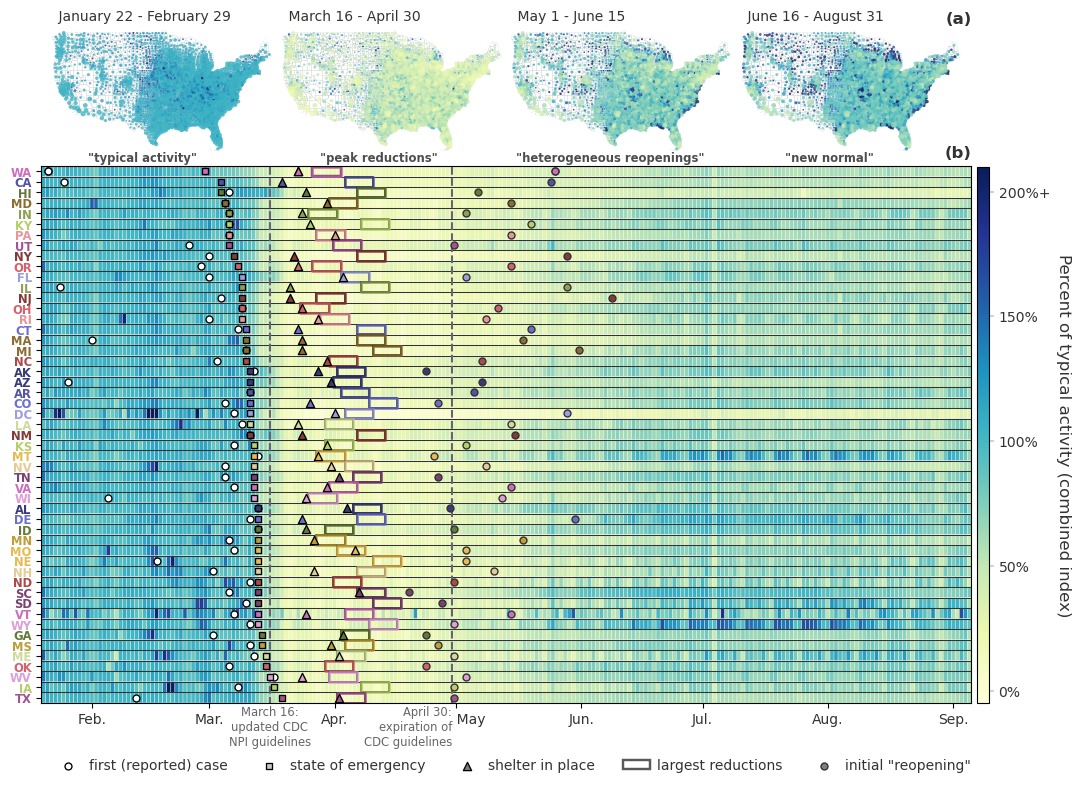

In [12]:
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

vmin = 0.05; vmax = 1.95
ms_o = 25; ms_s = 20; ms_t = 35
cmaa = plt.cm.YlGnBu
fc = '.2'; date_col = '.4'

fig = plt.figure(figsize=(12,9),dpi=100)
gs = GridSpec(2, 4, figure=fig, height_ratios=[1,4])

ax00 = fig.add_subplot(gs[0, 0])
ax01 = fig.add_subplot(gs[0, 1])
ax02 = fig.add_subplot(gs[0, 2])
ax03 = fig.add_subplot(gs[0, 3])
axs = [ax00,ax01,ax02,ax03]

map_labs = ['January 22 - February 29', 'March 16 - April 30', 'May 1 - June 15', 'June 16 - August 31']
time_frames = ["typical_activity","peak_reductions","heterogeneous_reopenings","new_normal"]

for wi, w_list in enumerate(time_frames):
    print("%02i"%wi,dt.datetime.now())

    axa = axs[wi]
    val = wdf.loc[wdf['timeframe']==w_list].copy()

    # add shapefile of map
    usa_shp = dat_shp.merge(val, how='left', on='location_id')
    usa_shp.crs = {"init": "epsg:4326"}
    usa_shp = usa_shp.to_crs(epsg=3395)
    mapplot_i = usa_shp.plot(ax=axa, ec='0.6', fc='None', lw=0.1, alpha=0.8)
    mapplot_i.set_rasterized(True)

    # add title and get axis params
    axa.set_title("    "+map_labs[wi],  fontsize='medium', color=fc, pad=-1, loc='left')
    ylim = axa.get_ylim()
    xlim = axa.get_xlim()
    axa.set_axis_off()
    ax2 = axa.twinx()
    
    # add points showing the average activity at the county level
    mapplot_2 = ax2.scatter(usa_shp.geometry.centroid.x.values,
                            usa_shp.geometry.centroid.y.values,
                            s=1+np.log(usa_shp['num_home_users'])**2/10, lw=0,
                            c=usa_shp.collapsed_measure, vmin=0.0, vmax=2.0, cmap=cmaa, alpha=0.8)
    mapplot_2.set_rasterized(True)

    # finalize map dimensions
    ax2.set_ylim(ylim[0],ylim[1])
    ax2.set_xlim(xlim[0],xlim[1])
    ax2.set_axis_off()

# add heatmap
ax = fig.add_subplot(gs[-1, :])
ax.pcolor((np.array(state_collapsed)), vmin=0.05, vmax=1.95, edgecolors='.99', lw=0.25, cmap=cmaa)

# add colorbar
sm = plt.cm.ScalarMappable(cmap=cmaa, norm=plt.Normalize(vmin=-0.05, vmax=2.1))
sm._A = []
y0 = ax.get_position().y0 
x1 = ax.get_position().x1 * 1.005
h0 = 1.085*(ax.get_position().y1-ax.get_position().y0)
w0 = 0.01
pos_c = [x1, y0, w0, h0]
cbar = fig.colorbar(sm, cax=fig.add_axes(pos_c))
cbar.set_ticks([0,0.5,1.0,1.5,2])
cbar.set_ticklabels(["0%","50%","100%","150%","200%+"])
cbar.ax.tick_params(labelsize='medium', labelcolor=fc, width=0.25)
cbar.set_label('Percent of typical activity (combined index)',rotation=270,
               labelpad=15,color='.2',fontsize='large')


# add labels and key dates
for ix,i in enumerate(states):
    # get horizontal values for important dates
    first_date_i = first_date_dict[i]
    emerg_date_i = emerg_date_dict[i]
    shelt_date_i = shelt_date_dict[i]
    xval_i_first = np.where(np.array(DATERANGE)==first_date_i)[0]+0.5
    xval_i_emerg = np.where(np.array(DATERANGE)==emerg_date_i)[0]+0.5
    xval_i_shelt = np.where(np.array(DATERANGE)==shelt_date_i)[0]+0.5

    yvi = [ix+0.5]
    ax.hlines(ix,0,PLOTDATES[-1]+1,color='.2',zorder=1,linewidth=0.75)
    if ix==0:
        ax.scatter(xval_i_first, yvi[:len(xval_i_first)], c='.99', marker='o',
                   lw=0.95, s=ms_o, edgecolors='k', zorder=2, label='first (reported) case')
        ax.scatter(xval_i_emerg, yvi[:len(xval_i_emerg)], c='.79', marker='s',
                   lw=0.95, s=ms_s, edgecolors='k', zorder=2, label='state of emergency')
        ax.scatter(xval_i_shelt, yvi[:len(xval_i_shelt)], c='.49', marker='^',
                   lw=0.95, s=ms_t, edgecolors='k', zorder=2, label='shelter in place')
        ax.scatter(xval_i_first, yvi[:len(xval_i_first)], c=['w'], marker='o',
                   lw=0.95, s=ms_o, edgecolors='k', zorder=2)
        ax.scatter(xval_i_emerg, yvi[:len(xval_i_emerg)], c=[label_cols[i]], marker='s',
                   lw=0.95, s=ms_s, edgecolors='k', zorder=2)
        ax.scatter(xval_i_shelt, yvi[:len(xval_i_shelt)], c=[label_cols[i]], marker='^',
                   lw=0.95, s=ms_t, edgecolors='k', zorder=2)
        
    else:
        ax.scatter(xval_i_first, yvi[:len(xval_i_first)], c=['w'], marker='o',
                   lw=0.95, s=ms_o, edgecolors='k', zorder=2)
        ax.scatter(xval_i_emerg, yvi[:len(xval_i_emerg)], c=[label_cols[i]], marker='s',
                   lw=0.95, s=ms_s, edgecolors='k', zorder=2)
        ax.scatter(xval_i_shelt, yvi[:len(xval_i_shelt)], c=[label_cols[i]], marker='^',
                   lw=0.95, s=ms_t, edgecolors='k', zorder=2)

# add lines and text for national events
updated_guidelines = '2020-03-16'
expired_guidelines = '2020-04-30'
updated_guidelines_x = np.where(np.array(DATERANGE)==updated_guidelines)[0][0]+0.5
expired_guidelines_x = np.where(np.array(DATERANGE)==expired_guidelines)[0][0]+0.5
ax.vlines(updated_guidelines_x, -1, 51, linestyle="--", zorder=1, color=date_col)
ax.vlines(expired_guidelines_x, -1, 51, linestyle="--", zorder=1, color=date_col)
ax.text(updated_guidelines_x, 51.25, "March 16:\nupdated CDC\nNPI guidelines",
         ha='center',va='top', color=date_col, fontsize='small')
ax.text(expired_guidelines_x, 51.25, "April 30:\nexpiration of\nCDC guidelines",
         ha='right',va='top', color=date_col, fontsize='small')

# add shading for largest reductions
for ix,i in enumerate(states):
    st_i_df = st_dash.loc[st_dash.name==i]
    min_i = np.argmin(min_dicts[i])
    if ix == 0:
        ax.fill_between(range(min_i,min_i+8), ix+0.05, ix+0.975,
                        edgecolors='.35', facecolor='None', zorder=1, lw=1.75,
                        label='largest reductions')
    ax.fill_between(range(min_i,min_i+8), ix+0.05, ix+0.975,
                        edgecolors='k', facecolor='None', zorder=1, lw=1.2)
    ax.fill_between(range(min_i,min_i+8), ix+0.05, ix+0.975,
                        edgecolors=label_cols[i], facecolor='None', zorder=1, lw=2, alpha=0.8)

all_names_state = {j:i.upper() for i,j in all_state_names.items()}
all_state_names = {j:i for i,j in all_names_state.items()}
for ix,i in enumerate(states):
    reopen_date_i = date_dict2[initial_reopening[all_names_state[i].lower()]]
    if ix == 0:
        ax.scatter([reopen_date_i], [ix+0.5], s=ms_o, c='.5', zorder=0, lw=1,
                   label='initial "reopening"', edgecolors='.2')
        ax.scatter([reopen_date_i], [ix+0.5], s=ms_o, c=[label_cols[i]], zorder=1,
                   lw=1, edgecolors='.2')
    ax.scatter([reopen_date_i], [ix+0.5], s=ms_o, c=[label_cols[i]], zorder=1,
               lw=1, edgecolors='.2')
    
l = ax.legend(ncol=5, bbox_to_anchor=[0.0, -0.08], fontsize='medium', loc=2,
          handletextpad=0.5, columnspacing=2, framealpha=0)
for text in l.get_texts():
    text.set_color('.2')

ax.set_ylim(0,51)
ax.set_xlim(19,len(PLOTDATES))

states_lab = [all_names_state[i] for i in states]
ax.set_yticks([i+0.5 for i in range(len(states_lab))])
ax.set_yticklabels(states_lab,fontsize='small',fontweight='bold',color='.2')
for ticklabel in ax.get_yticklabels():
    ticklabel.set_color(label_cols[all_state_names[ticklabel.get_text()]])

ax.set_xticks([31.5,60.5,91.5,121.5,152.5,182.5,213.5,244.5])
ax.set_xticklabels(['Feb.','Mar.','Apr.', '       May','Jun.','Jul.','Aug.','Sep.'],
                   color='.2',fontsize='medium')


ax.text(0.05,1.003,'"typical activity"', ha='left', va='bottom',transform=ax.transAxes,
          fontsize='small', color='.3', fontweight='bold')
ax.text(0.30,1.003,'"peak reductions"', ha='left', va='bottom',transform=ax.transAxes,
          fontsize='small', color='.3', fontweight='bold')
ax.text(0.51,1.003,'"heterogeneous reopenings"', ha='left', va='bottom',transform=ax.transAxes,
          fontsize='small', color='.3', fontweight='bold')
ax.text(0.80,1.003,'"new normal"', ha='left', va='bottom',transform=ax.transAxes,
          fontsize='small', color='.3', fontweight='bold')

ax.text(1.0, 1.26, '(a)', fontsize='large',fontweight='bold',transform=ax.transAxes,
        horizontalalignment='right', verticalalignment='bottom',color='.2')
ax.text(1.0, 1.01, '(b)', fontsize='large',fontweight='bold',transform=ax.transAxes,
        horizontalalignment='right', verticalalignment='bottom',color='.2')

ax.invert_yaxis()

fig.subplots_adjust(wspace=-0.05, hspace=0.025)

plt.savefig('../figs/pngs/states_heatmap_all_withmaps.png', dpi=425, bbox_inches='tight')
plt.savefig('../figs/pdfs/states_heatmap_all_withmaps.pdf', dpi=300, bbox_inches='tight')

plt.show()

____________

# Figure 3

In [13]:
mon_df = pd.read_csv('../data/fig3_msa_monthly_employment_and_cuebiq.tsv', sep='\t', dtype={'location_id':str})
min_home_users = 1000

feb_df = mon_df.loc[(mon_df['month'].isin([2]))&(mon_df['num_home_users']>min_home_users)].copy()
apr_df = mon_df.loc[(mon_df['month'].isin([4]))&(mon_df['num_home_users']>min_home_users)].copy()
jul_df = mon_df.loc[(mon_df['month'].isin([7]))&(mon_df['num_home_users']>min_home_users)].copy()

mon_dfs = [feb_df, apr_df, jul_df]

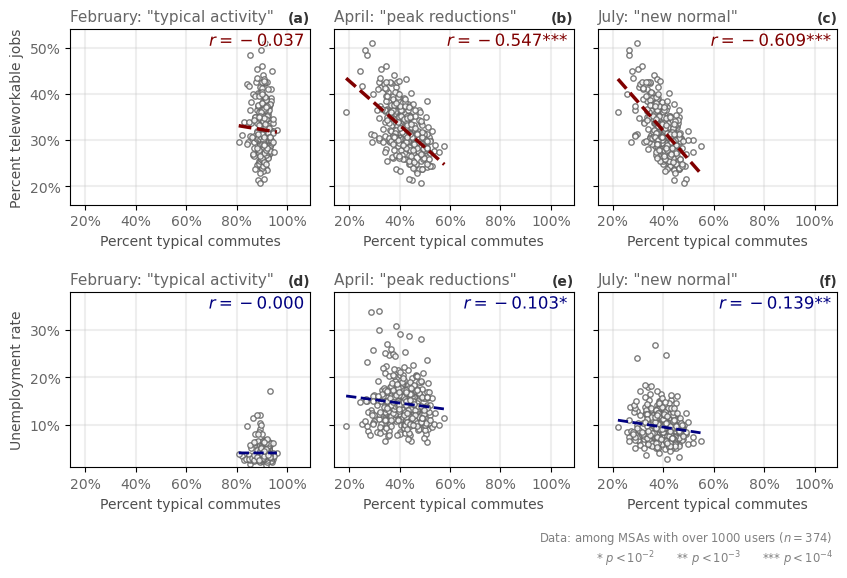

In [14]:
cmaa = 'Blues'
telewo_m = 'teleworkable_emp'
v_min = np.nanmin(mon_df[telewo_m].values)
v_max = np.nanmax(mon_df[telewo_m].values)
vdiff = v_max-v_min

month_map = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July'}
cuebiq_m = 'commuters_home_percent'; employ_m = 'rate_unemployed'
xlab_i = 'Percent typical commutes'; ylab_i = 'Unemployment rate'

w = 3.3; h = 2.9
nrows = 2; ncols = 3

main_col = 'steelblue'
alt_col1 = 'maroon'
alt_col2 = 'navy'
abcs = ["(a)","(b)","(c)","(d)","(e)","(f)"]
labs = ['February: "typical activity"', 'April: "peak reductions"', 'July: "new normal"',
        'February: "typical activity"', 'April: "peak reductions"', 'July: "new normal"']

tups = list(it.product(range(nrows), range(ncols)))
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols,h*nrows), dpi=100)

plt.subplots_adjust(wspace=0.1,hspace=0.5)
ins_lims = []
for ix, df_i in enumerate(mon_dfs):
    a1 = tups[ix]
    ax[a1].scatter(df_i[cuebiq_m].values,
                   df_i[telewo_m].values,
                   s=15, lw=1, ec='.4', alpha=0.85, c='w')

    sl_i, in_i, rv_i, pv_i, st_i = linregress(df_i.loc[~df_i[telewo_m].isna()][cuebiq_m].values,
                                              df_i.loc[~df_i[telewo_m].isna()][telewo_m].values)
    xvp = np.array([df_i[cuebiq_m].min(), df_i[cuebiq_m].max()])

    if pv_i > 0.05:
        pla = ''
    elif int(np.log10(pv_i).round()) > -2:
        pla = '*'
    elif int(np.log10(pv_i).round()) > -3:
        pla = '**'
    elif int(np.log10(pv_i).round()) > -4:
        pla = '***'
    else:
        pla = '***'

    reg_lab = r"$r =%.3f$"%rv_i + pla

    ax[a1].plot(xvp, xvp*sl_i + in_i, color=alt_col1, linestyle='--', linewidth=2.5)

    ax[a1].set_title(labs[ix], x=0, ha='left', color='.4', fontsize=11)
    
    text = ax[a1].text(0.98, 0.98,reg_lab, transform=ax[a1].transAxes,
               ha='right', va='top', color=alt_col1, fontsize='large')
    text.set_path_effects([path_effects.Stroke(linewidth=1.5, foreground='w'),
                           path_effects.Normal()])
    ax[a1].text(1.00,1.025,abcs[ix],fontweight='bold',transform=ax[a1].transAxes,
              ha='right',va='bottom',fontsize='medium', color='.2')

    a2 = tups[ix+3]
    ax[a2].scatter(df_i[cuebiq_m].values,
                   df_i[employ_m].values,
                   s=15, lw=1, ec='.4', alpha=0.85, c='w')

    sl_i, in_i, rv_i, pv_i, st_i = linregress(df_i[cuebiq_m].values, df_i[employ_m].values)
    xvp = np.array([df_i[cuebiq_m].min(), df_i[cuebiq_m].max()])

    if pv_i > 0.05:
        pla = ''
    elif int(np.log10(pv_i).round()) > -2:
        pla = '*'
    elif int(np.log10(pv_i).round()) > -3:
        pla = '**'
    elif int(np.log10(pv_i).round()) > -4:
        pla = '***'
    else:
        pla = '***'

    reg_lab = r"$r =%.3f$"%rv_i + pla

    ax[a2].plot(xvp, xvp*sl_i + in_i, color=alt_col2, linestyle='--', linewidth=2)
    text = ax[a2].text(0.98, 0.98,reg_lab,transform=ax[a2].transAxes,
               ha='right', va='top', color=alt_col2, fontsize='large')
    text.set_path_effects([path_effects.Stroke(linewidth=1.5, foreground='w'),
                           path_effects.Normal()])

    ax[a2].set_title(labs[ix], x=0, ha='left', color='.4', fontsize=11)
    ax[a2].text(1.00,1.025,abcs[ix+3],fontweight='bold',transform=ax[a2].transAxes,
              ha='right',va='bottom',fontsize='medium', color='.2')


for ai,a in enumerate(fig.axes):
    a.set_xlim(0.14, 1.09)
    a.tick_params(axis='both',labelcolor='.4')
    if ai==0:
        a.set_ylabel('Percent teleworkable jobs', color='.3')
        a.set_yticks([0.2,0.3,0.4,0.5])
        a.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0,decimals=0))
        a.set_ylim(0.16, 0.54)
    elif ai in [1,2]:
        a.set_yticks([0.2,0.3,0.4,0.5])
        a.set_yticklabels(['','','',''])
        a.set_ylim(0.16, 0.54)
    elif ai==3:
        a.set_ylabel('Unemployment rate', color='.3')
        a.set_yticks([0.1,0.2,0.3])
        a.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0,decimals=0))
        a.set_ylim(0.01, 0.38)
    else:
        a.set_yticks([0.1,0.2,0.3])
        a.set_yticklabels(['','',''])
        a.set_ylim(0.01, 0.38)

    a.set_xlabel(xlab_i, color='.3')
        
    a.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0,decimals=0))
    a.grid(color='.75',alpha=0.25,linewidth=1.5)
        

n_counties = mon_df.loc[mon_df['num_home_users']>min_home_users]['msa_id'].nunique()
txt1 = 'Data: among MSAs with over %i users ($n=%i$)'%(min_home_users,n_counties)
txt2 = '\n'
txt3 = r'* $p < 10^{-2}$      ** $p < 10^{-3}$      *** $p < 10^{-4}$'
ax[tups[-1]].text(0.98, -0.35,txt1+txt2+txt3, transform=ax[tups[-1]].transAxes,
           ha='right', va='top', color='.5', fontsize='small')


plt.savefig('../figs/pngs/%s_vs_%s_CBSA_phases.png'%(cuebiq_m, employ_m),dpi=425,bbox_inches='tight')
plt.savefig('../figs/pdfs/%s_vs_%s_CBSA_phases.pdf'%(cuebiq_m, employ_m),bbox_inches='tight')
plt.show()

____________

# Figure 4

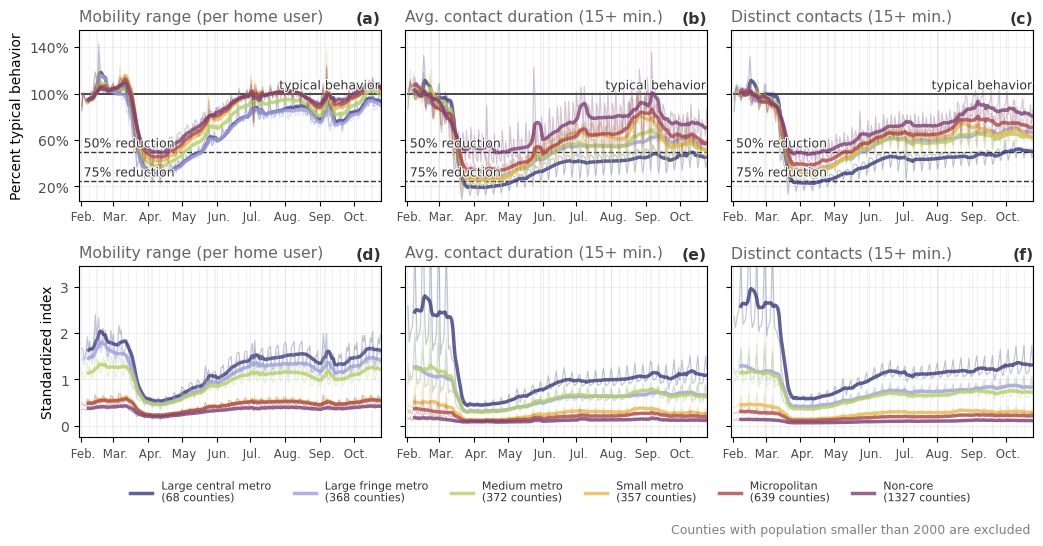

In [15]:
pop_thresh = 2000
urg_df = pd.read_csv('../data/publication_data_weighted.csv')

xtx = ['2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01',
       '2020-07-01','2020-08-01','2020-09-01','2020-10-01']
xtxl = ['Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.']


national_emergency = '2020-03-13'
updated_guidelines = '2020-03-16'
expired_guidelines = '2020-04-30'
national_emergency_x = np.where(np.array(DATERANGE)==national_emergency)[0][0]
updated_guidelines_x = np.where(np.array(DATERANGE)==updated_guidelines)[0][0]
expired_guidelines_x = np.where(np.array(DATERANGE)==expired_guidelines)[0][0]

textcol = '.5'
vlinecol = '.5'

fs = 9
ms = 8
lw = 2.5

w = 4.105; h = 2.7
ncols = 3; nrows = 2
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(ncols*w,nrows*h), dpi=100)
plt.subplots_adjust(wspace=0.08,hspace=0.38)

cols = plt.cm.tab20b(np.linspace(0,1,7))
wid = 7

typical_measures_mob = ['mobility_per_home_user',
                        'edge_minutes_15min_durations',
                        'distinct_edges_15min_durations_per_distinct_user']#,

plot_measures = [i+'_percent' for i in typical_measures_mob] + [i+'_index' for i in typical_measures_mob]

plot_titles = ['Mobility range (per home user)',
               'Avg. contact duration (15+ min.)',
               'Distinct contacts (15+ min.)',
               'Mobility range (per home user)',
               'Avg. contact duration (15+ min.)',
               'Distinct contacts (15+ min.)']

urg_numcounties = [68,368,372,357,639,1327]

for ix,urc in enumerate([1, 2, 3, 4, 5, 6]):
    urcg_i = urg_df.loc[urg_df['location_id']==str(float(urc))].copy()
    xvals = np.array([date_dict[i] for i in urcg_i['date'].values])
    for pi, pm in enumerate(plot_measures):
        yvals_i_raw = urcg_i[pm].values
        yvals_i_rol = urcg_i[pm].rolling(window=wid).mean().values
        nc_i = urg_numcounties[ix]
        ax[tups[pi]].plot(xvals,yvals_i_raw,'-',linewidth=lw/3,alpha=0.3,color=cols[ix])
        ax[tups[pi]].plot(xvals,yvals_i_rol,'-',linewidth=lw,alpha=0.8,color=cols[ix],
                          label="%s\n(%i counties)"%(urcg_i['name'].values[0],nc_i))

letts = ['(a)','(b)','(c)','(d)','(e)','(f)']
ax[(0,0)].set_ylabel('Percent typical behavior', fontsize=fs*1.1)
ax[(1,0)].set_ylabel('Standardized index', fontsize=fs*1.1)

ymin = 0.075
ymax = 1.550

for ai,a in enumerate(fig.axes):

    for wi, wnd in enumerate(DATE_DF['day'].tolist()):
        if wnd == 'Saturday':
            a.fill_between([wi-0.05,wi+1.05], -1, 5, linewidth=0, color='.85', alpha=0.3, zorder=0)

    a.grid(color='.7',alpha=0.3,linewidth=0.5)
    a.set_xticks([date_dict[i] for i in xtx])
    a.set_xticklabels([" %s"%s for s in xtxl],fontsize=8.5)
    a.tick_params(which='both', labelcolor='.3')

    a.set_title(plot_titles[ai], loc='left', color='.4', fontsize=fs*1.25)
    a.set_xlim(-2.5,xvals[-1]+0.5)
    if ai>=3:
        a.set_ylim(-0.25,3.45)
        if ai==3:
            a.set_yticks([0,1,2,3])
        else:
            a.set_yticks([0,1,2,3])
            a.set_yticklabels(['','','',''])
    else:
        text1 = a.text(xvals[1]+0.6, 0.51, "50% reduction", fontsize=fs, color='.2',
                   horizontalalignment='left', verticalalignment='bottom')
        a.hlines(0.50, -5, xvals[-1]+3, linestyle='--',  color='.2', linewidth=1.0)
        text2 = a.text(xvals[1]+0.6, 0.26, "75% reduction", fontsize=fs, color='.2',
                   horizontalalignment='left', verticalalignment='bottom')
        a.hlines(0.25, -5, xvals[-1]+3, linestyle='--',  color='.2', linewidth=1.0)
        text3 = a.text(xvals[-1]-0.5, 1.01, "typical behavior", fontsize=fs,
                horizontalalignment='right', verticalalignment='bottom', color='.2')
        a.hlines(1,-1,xvals[-1]+1, linestyle='-',color='.2', linewidth=1.25)
        for text in [text1,text2,text3]:
            text.set_path_effects([path_effects.Stroke(linewidth=1.5, foreground='w'),
                               path_effects.Normal()])
        
        a.set_ylim(ymin,ymax)
        if ai==0:
            a.set_yticks([.2,.6,1.0,1.4])
            a.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))
        else:
            a.set_yticks([.2,.6,1.0,1.4])
            a.set_yticklabels(['','','',''])

    a.text(1.0, 1.02, letts[ai], fontsize=fs*1.25,fontweight='bold',
            ha='right', va='bottom',color='.2', transform=a.transAxes)
    if ai == len(plot_titles)-1:
        l = a.legend(ncol=6,fontsize=fs*0.886,bbox_to_anchor=[0.825,-0.2],framealpha=0)
        for text in l.get_texts():
            text.set_color('.2')
            text.set_path_effects([path_effects.Stroke(linewidth=1.5, foreground='w'),
                           path_effects.Normal()])

            

text_bot = "Counties with population smaller than %i are excluded"%pop_thresh
a.text(0.99, -0.5, text_bot, ha='right', va='top', transform=a.transAxes,
       fontsize=fs, color='.5')

plt.savefig('../figs/pngs/urbanrural_cuebiq_percent_index_weights.png', dpi=425, bbox_inches='tight')
plt.savefig('../figs/pdfs/urbanrural_cuebiq_percent_index_weights.pdf', bbox_inches='tight')

plt.show()

____________

# Figure 5

In [16]:
usa_df_out = pd.read_csv('../data/fig5_data_usa.csv')

In [17]:
pop_usa = 330000000
start_date_i = '2020-04-30'
end_date_i = '2020-10-25'
rt0 = r"$R_t = 0.9$"
rt1 = r"$R_t = 1.0$"
rt2 = r"$R_t = 1.1$"

fs = 9
cmaa = 'RdPu'
letts = ['(a)', '(b)']
ylab_i = 'New deaths per day\n(nationwide, per 100,000)'
xlab_i = 'Percent of typical activity'
tm = ['edge_minutes_15min_durations', 'distinct_edges_15min_durations_per_distinct_user']
ind_per = '_percent'
titles = ['Avg. contact duration (15+ min.)', 'Distinct contacts (15+ min.)']
covid_m = 'deathIncrease'

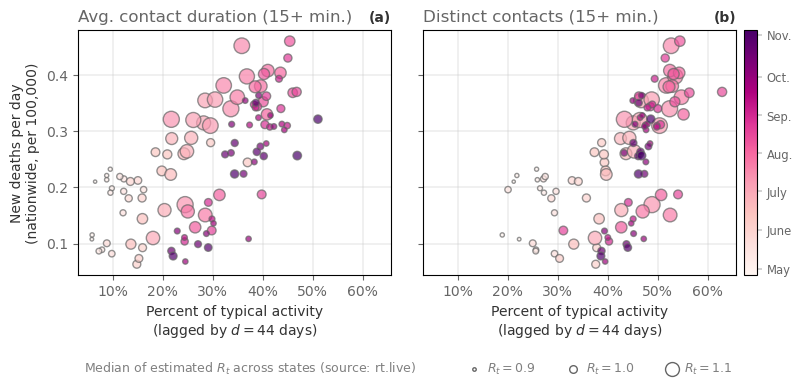

In [18]:
from matplotlib.lines import Line2D
dlist = np.arange(3,61,1,dtype=int)

w = 4.25; h = 3.25
ncols = 2; nrows = 1

fig, ax = plt.subplots(nrows, ncols, figsize=(ncols*w,nrows*h), dpi=100, sharey=True, sharex=True)
plt.subplots_adjust(wspace=0.1,hspace=0.25)


for i, cuebiq_m in enumerate(tm):
    cuebiq_m = cuebiq_m + ind_per
    rvd = 0
    di = 0
    dout = []
    for d in dlist:
        usa_df_d = usa_df_out.loc[~usa_df_out[covid_m].isna()].copy()
        x_usa = usa_df_d[cuebiq_m].values[:-d]
        y_usa = usa_df_d[covid_m].values[d:] / pop_usa * 100000
        sl_d, in_d, rv_d, pv_d, st_d = linregress(x_usa[6:],y_usa[6:])
        dout.append(rv_d)
        if rv_d > rvd:
            di = d
            rvd = rv_d

    d = di
    x_usa = usa_df_d[cuebiq_m].values[:-d]
    y_usa = usa_df_d[covid_m].values[d:] / pop_usa * 100000
    sl_d, in_d, rv_d, pv_d, st_d = linregress(x_usa[6:],y_usa[6:])
    
    cols = np.linspace(0,1,len(x_usa))
    sizs = usa_df_d['rt_median'][:-d].values

    ax[i].scatter(x_usa, y_usa, c=cols, lw=1, s=sizs**15 * 30, cmap=cmaa, ec='.4', alpha=0.7)
    ax[i].set_title(titles[i], ha='left', x=0, color='.4')
    ax[i].set_xlabel(xlab_i+'\n'+r'(lagged by $d=%i$ days)'%d, color='.2')
    ax[i].xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0,decimals=0))
    ax[i].tick_params(labelcolor='.4',color='.4')
    ax[i].grid(linewidth=1.25, color='.75', alpha=0.25)
    ax[i].text(1.0, 1.02, letts[i], ha='right', va='bottom', fontsize='medium',
               transform=ax[i].transAxes, color='.2', fontweight='bold')


ax[0].set_ylabel(ylab_i, color='.2')
sm = plt.cm.ScalarMappable(cmap=cmaa,norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []
y0 = ax[i].get_position().y0 
x1 = ax[i].get_position().x1 * 1.01
h0 = ((nrows)+(0.25)*(nrows-1))*(ax[i].get_position().y1-ax[i].get_position().y0)
w0 = 0.015
pos_c = [x1, y0, w0, h0]
cbar = fig.colorbar(sm, cax=fig.add_axes(pos_c))
cbar.set_ticks([5/193, 36/193, 66/193, 96/193, 126/193, 156/193, 189/193])
cbar.set_ticklabels(['May','June','July','Aug.', 'Sep.', 'Oct.', 'Nov.'])
cbar.ax.tick_params(labelcolor='.4', width=0.25,labelsize='small')

legend_elements = [Line2D([0], [0], marker='o', linestyle='', 
                          markeredgecolor='.4', label=rt0,
                          markerfacecolor='w', markersize=2.5),
                  Line2D([0], [0], marker='o', linestyle='', 
                          markeredgecolor='.4', label=rt1,
                          markerfacecolor='w', markersize=5.5),
                  Line2D([0], [0], marker='o', linestyle='', 
                          markeredgecolor='.4', label=rt2,
                          markerfacecolor='w', markersize=10)]

ax[0].text(1.08, -0.379, 'Median of estimated $R_t$ across states (source: rt.live)', ha='right',
           va='center', transform=ax[0].transAxes,
       fontsize=fs, color='.5')


l = ax[1].legend(handles=legend_elements, loc=4, ncol=3, bbox_to_anchor=[1.025,-0.46], handletextpad=0,
             fontsize=fs, framealpha=0)
for text in l.get_texts():
    text.set_color('.5')

plt.savefig('../figs/pngs/new_deaths_contact_measures_national.png',dpi=425,bbox_inches='tight')
plt.savefig('../figs/pdfs/new_deaths_contact_measures_national.pdf',bbox_inches='tight')

plt.show()

__________

# Example Figure SI

In [19]:
state_posx = {'ak': (0, 0), 'me': (0, 9), 'vt': (0, 7), 'nh': (0, 8), 'wa': (1, 0), 'id': (1, 1),
              'mt': (1, 2), 'nd': (1, 3), 'mn': (1, 4), 'il': (1, 5), 'wi': (0, 6), 'mi': (1, 6),
              'ny': (1, 7), 'ri': (1, 8), 'ma': (1, 9), 'or': (2, 0), 'nv': (2, 1), 'wy': (2, 2),
              'sd': (2, 3), 'ia': (2, 4), 'in': (2, 5), 'oh': (2, 6), 'pa': (2, 7), 'nj': (2, 8),
              'ct': (2, 9), 'ca': (3, 0), 'ut': (3, 1), 'co': (3, 2), 'ne': (3, 3), 'mo': (3, 4),
              'ky': (3, 5), 'wv': (3, 6), 'va': (3, 7), 'md': (3, 8), 'de': (3, 9), 'az': (4, 1),
              'nm': (4, 2), 'ks': (4, 3), 'ar': (4, 4), 'tn': (4, 5), 'nc': (4, 6), 'sc': (4, 7),
              'dc': (4, 8), 'ok': (5, 3), 'la': (5, 4), 'ms': (5, 5), 'al': (5, 6), 'ga': (5, 7),
              'hi': (5, 0), 'tx': (6, 3), 'fl': (6, 7)}

In [20]:
st_df = df_w.loc[df_w['location_resolution']=='state'].merge(KEY_DATES.loc[KEY_DATES['location_resolution']=='state'][['name',
                               'date_of_1st_case', 'state_of_emergency', 'shelter_in_place','initial_reopening']].drop_duplicates(),
                                                             how='left', on=['name'])

In [21]:
label_dict = {'mobility_per_home_user_percent':'mobility range',
              'commuters_per_home_user_percent':'commute volume',
              'inter_region_mobility_percent':'inter-CSA transit',
              'edge_minutes_15min_durations_percent':'avg. contact duration (15+ min.)',
              'distinct_edges_15min_durations_per_distinct_user_percent':'distinct contacts (15+ min.)'}
plot_columns = list(label_dict.keys())

cols = {'mobility_per_home_user_percent':'rebeccapurple',
        'commuters_per_home_user_percent':'#c23b5a',
        'inter_region_mobility_percent':'lightcoral',
        'edge_minutes_15min_durations_percent':'#00538a',
        'distinct_edges_15min_durations_per_distinct_user_percent':'darkturquoise'}#,

date_lstyle = {'state_of_emergency':':','shelter_in_place':'--','initial_reopening':'-'}
date_lcolor = {'state_of_emergency':'.1','shelter_in_place':'.3','initial_reopening':'.6'}
keydate_labs = {'state_of_emergency':'state of emergency',
                'shelter_in_place':'stay at home order',
                'initial_reopening':'initial reopening'}
date_columns = list(keydate_labs.keys())

In [22]:
initial_reopening = {'ak': '2020-04-24', 'al': '2020-04-30', 'ar': '2020-05-06', 'az': '2020-05-08',
                     'ca': '2020-05-25', 'co': '2020-04-27', 'ct': '2020-05-20', 'dc': '2020-05-29',
                     'de': '2020-05-31', 'fl': '2020-05-04', 'ga': '2020-04-24', 'hi': '2020-05-07',
                     'ia': '2020-05-01', 'id': '2020-05-01', 'il': '2020-05-29', 'in': '2020-05-04',
                     'ks': '2020-05-04', 'ky': '2020-05-20', 'la': '2020-05-15', 'ma': '2020-05-18',
                     'md': '2020-05-15', 'me': '2020-05-01', 'mi': '2020-06-01', 'mn': '2020-05-18',
                     'mo': '2020-05-04', 'ms': '2020-04-27', 'mt': '2020-04-26', 'nc': '2020-05-08',
                     'nd': '2020-05-01', 'ne': '2020-05-04', 'nh': '2020-05-11', 'nj': '2020-06-09',
                     'nm': '2020-05-16', 'nv': '2020-05-09', 'ny': '2020-05-29', 'oh': '2020-05-12',
                     'ok': '2020-04-24', 'or': '2020-05-15', 'pa': '2020-05-15', 'ri': '2020-05-09',
                     'sc': '2020-04-20', 'sd': '2020-04-28', 'tn': '2020-04-27', 'tx': '2020-05-01',
                     'ut': '2020-05-01', 'va': '2020-05-15', 'vt': '2020-05-15', 'wa': '2020-05-26',
                     'wi': '2020-05-13', 'wv': '2020-05-04', 'wy': '2020-05-01'}

all_state_names = {'ak': 'Alaska', 'al': 'Alabama', 'ar': 'Arkansas',
                   'as': 'American Samoa',  'az': 'Arizona',
                   'ca': 'California', 'co': 'Colorado',
                   'ct': 'Connecticut', 'dc': 'District of Columbia',
                   'de': 'Delaware', 'fl': 'Florida', 'ga': 'Georgia',
                   'gu': 'Guam', 'hi': 'Hawaii', 'ia': 'Iowa',
                   'id': 'Idaho', 'il': 'Illinois', 'in': 'Indiana',
                   'ks': 'Kansas', 'ky': 'Kentucky', 'la': 'Louisiana',
                   'ma': 'Massachusetts', 'md': 'Maryland', 'me': 'Maine',
                   'mi': 'Michigan', 'mn': 'Minnesota', 'mo': 'Missouri',
                   'mp': 'Northern Mariana Islands', 'ms': 'Mississippi',
                   'mt': 'Montana', 'nc': 'North Carolina',
                   'nd': 'North Dakota', 'ne': 'Nebraska',
                   'nh': 'New Hampshire', 'nj': 'New Jersey',
                   'nm': 'New Mexico', 'nv': 'Nevada', 'ny': 'New York',
                   'oh': 'Ohio', 'ok': 'Oklahoma', 'or': 'Oregon',
                   'pa': 'Pennsylvania', 'pr': 'Puerto Rico',
                   'ri': 'Rhode Island', 'sc': 'South Carolina',
                   'sd': 'South Dakota', 'tn': 'Tennessee', 'tx': 'Texas',
                   'ut': 'Utah', 'va': 'Virginia',
                   'vi': 'Virgin Islands', 'vt': 'Vermont',
                   'wa': 'Washington', 'wi': 'Wisconsin',
                   'wv': 'West Virginia', 'wy': 'Wyoming'}

all_state_ids = {'01': 'al', '02': 'ak', '04': 'az', '05': 'ar',
                 '06': 'ca', '08': 'co', '09': 'ct', '10': 'de',
                 '11': 'dc', '12': 'fl', '13': 'ga', '15': 'hi',
                 '16': 'id', '17': 'il', '18': 'in', '19': 'ia',
                 '20': 'ks', '21': 'ky', '22': 'la', '23': 'me',
                 '24': 'md', '25': 'ma', '26': 'mi', '27': 'mn',
                 '28': 'ms', '29': 'mo', '30': 'mt', '31': 'ne',
                 '32': 'nv', '33': 'nh', '34': 'nj', '35': 'nm',
                 '36': 'ny', '37': 'nc', '38': 'nd', '39': 'oh',
                 '40': 'ok', '41': 'or', '42': 'pa', '44': 'ri',
                 '45': 'sc', '46': 'sd', '47': 'tn', '48': 'tx',
                 '49': 'ut', '50': 'vt', '51': 'va', '53': 'wa',
                 '54': 'wv', '55': 'wi', '56': 'wy', "60": 'as',
                 "66": 'gu', "72": 'pr', '78': 'vi', '69': 'mp'}

all_ids_state = {j:i for i,j in all_state_ids.items()}

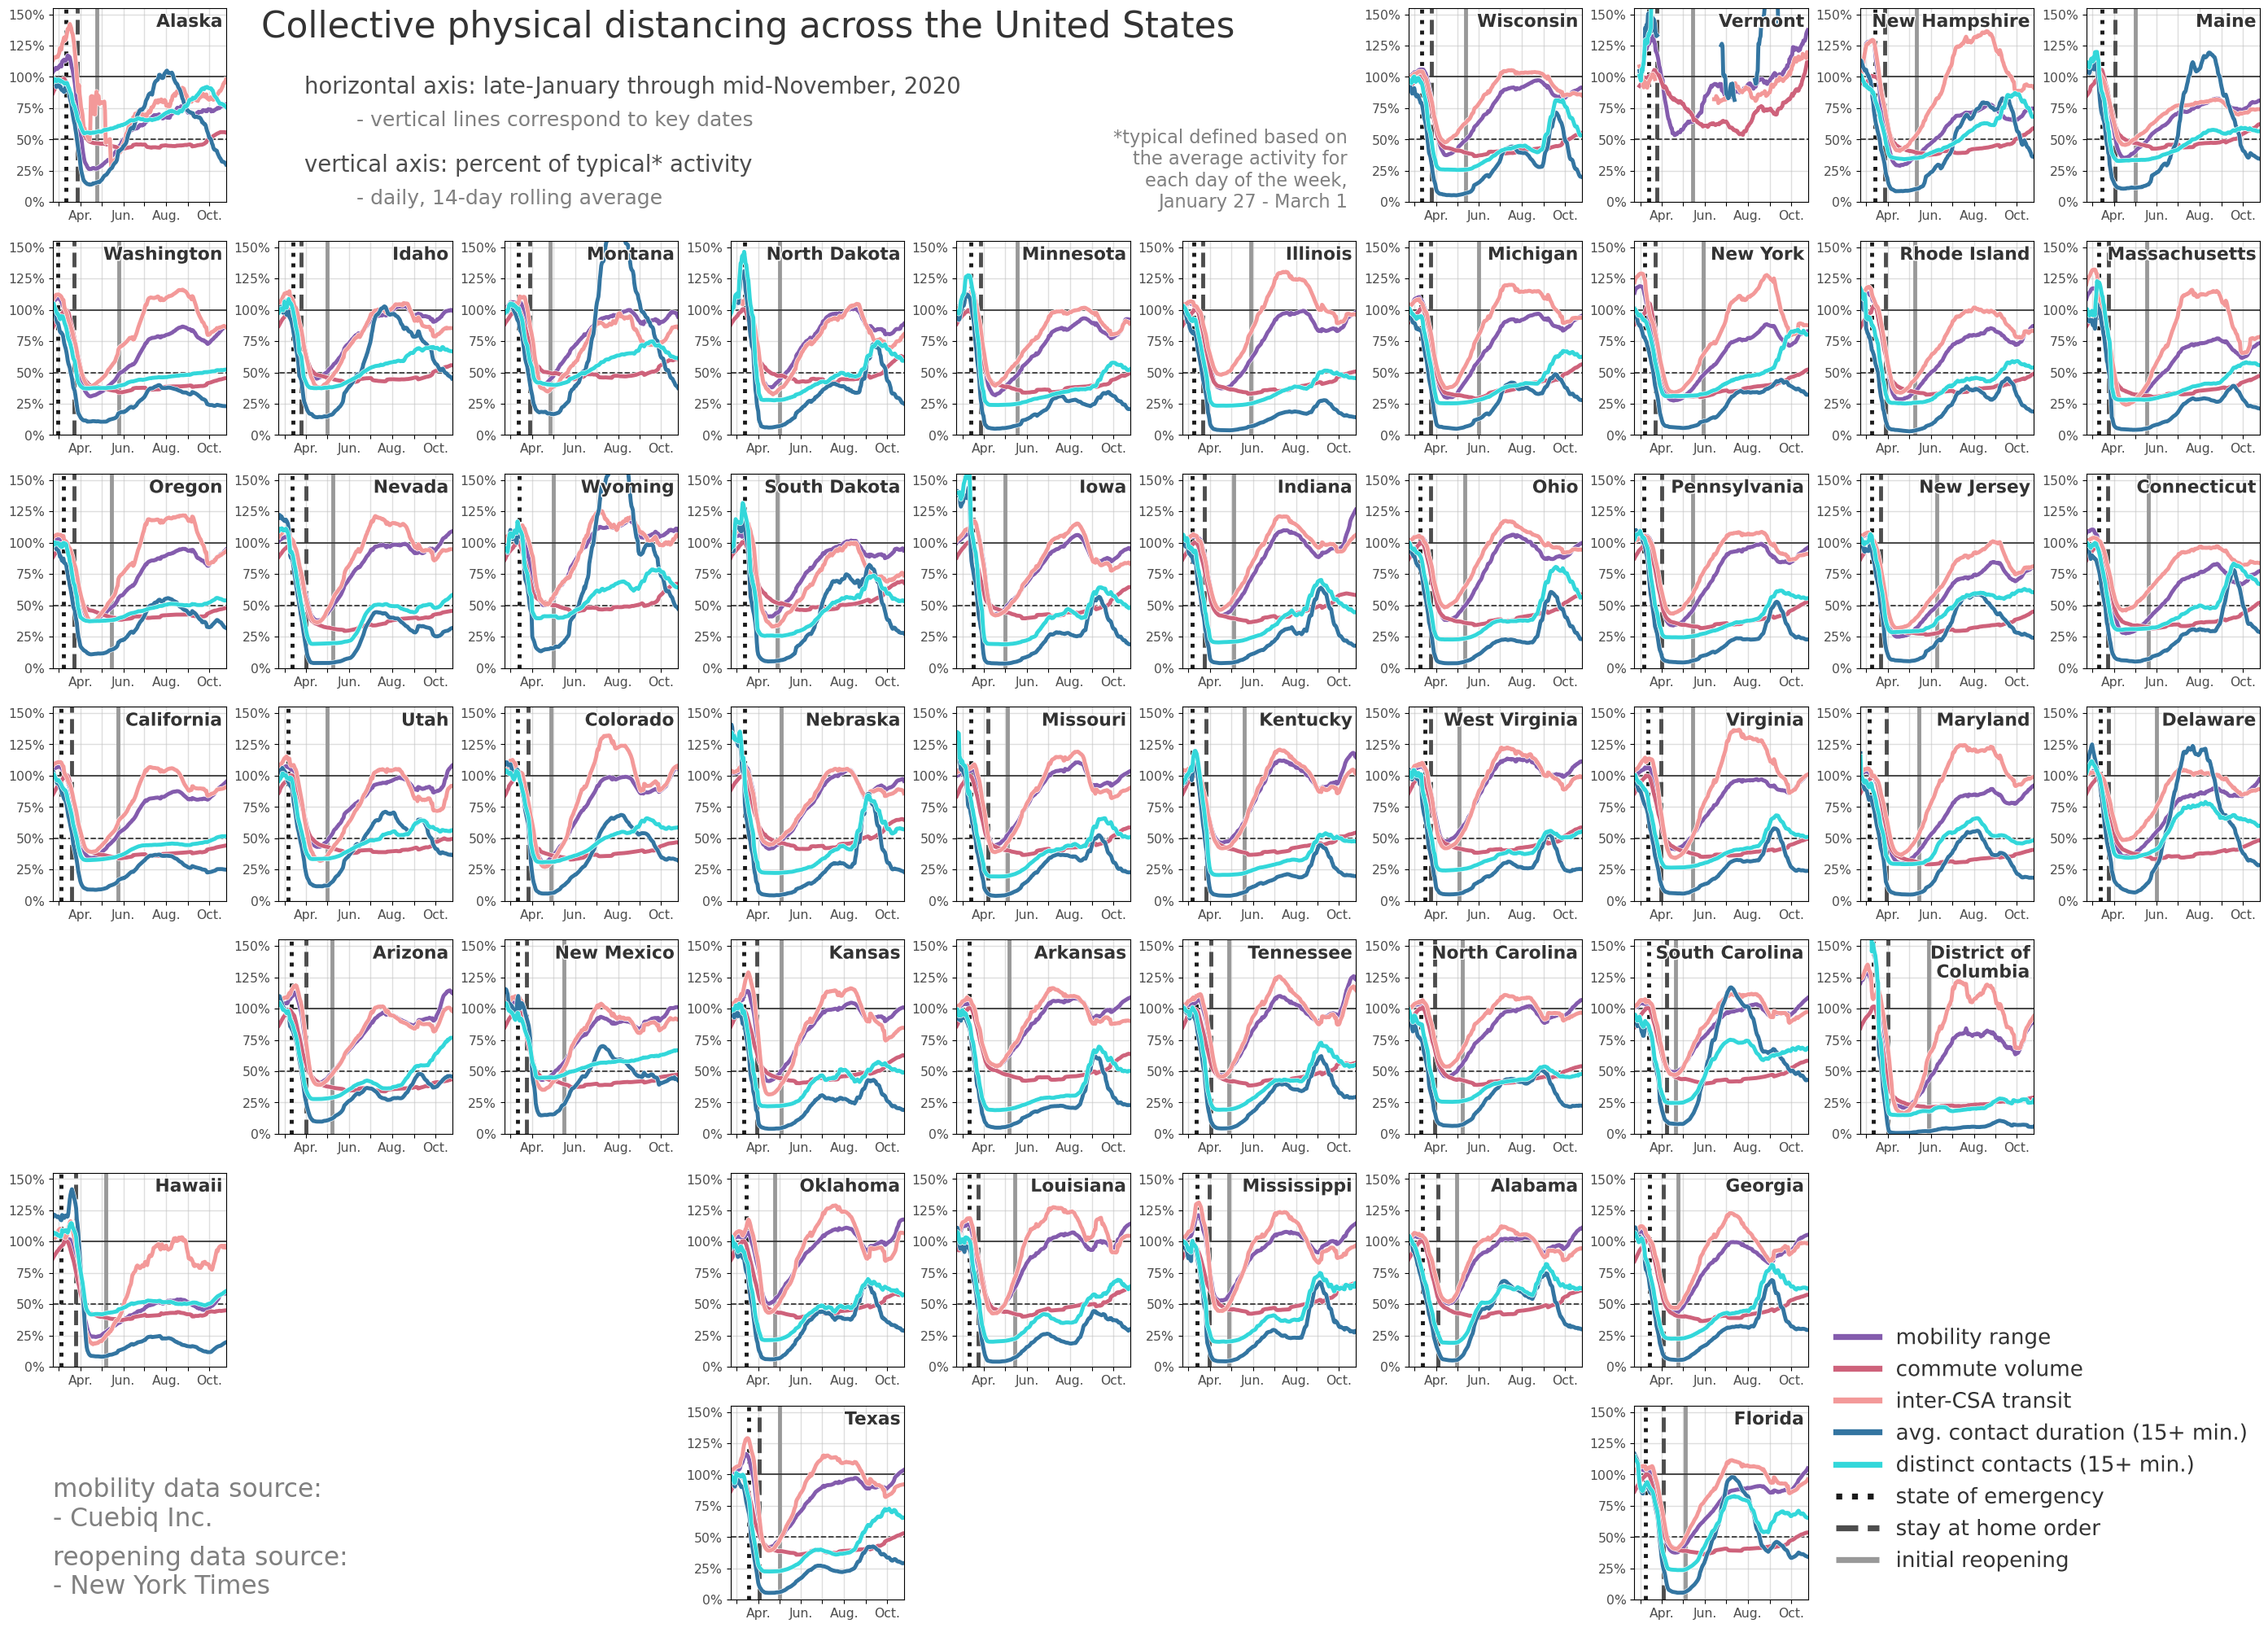

In [23]:
xtx = ['2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01','2020-07-01',
       '2020-08-01','2020-09-01','2020-10-01','2020-11-01']
xtxl = ['', 'Mar.','','May','','Jul.','','Sep.','','Nov.']
xtxl = ['Feb.', '','Apr.','','Jun.','','Aug.','','Oct.','']

lab_col = '.2'
lw = 3.5
ymin = 0.0; ymax = 1.55

w = 3.5; h = 3.7
ncols = 10; nrows = 7
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(ncols*w,nrows*h), dpi=100)#, sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.3,hspace=0.2)
wid = 21
for st, po in state_posx.items():
    stlab = all_state_names[st]
    if stlab not in st_df['name'].unique().tolist():
        ax[po].set_axis_off()
        continue

    st_df_i = st_df.loc[(st_df['name']==stlab)].copy()

    if stlab == 'District of Columbia':
        stlab = 'District of\nColumbia'
    if stlab == 'Vermont':
        wid = 28
    else: 
        wid = 21

    dates_i = st_df_i[['state_of_emergency','shelter_in_place','initial_reopening']].drop_duplicates()
    for dcol, dlab in keydate_labs.items():
        kdate_i = dates_i[dcol].unique()[0]
        if type(kdate_i) != float:
            ax[po].vlines(date_dict[kdate_i], ymin, ymax, linestyle=date_lstyle[dcol],
                          color=date_lcolor[dcol], linewidth=lw, label=dlab)
    
    xvals = np.array([date_dict[i] for i in st_df_i['date'].values])
    for ci,col in enumerate(plot_columns):
        yvals_i_rol = st_df_i[col].rolling(window=wid).mean().values
        yvals_i_raw = st_df_i[col].values
        ax[po].plot(xvals, yvals_i_rol,linewidth=lw, alpha=0.8, color=cols[col],label=label_dict[col],
                    path_effects=[path_effects.Stroke(linewidth=lw*1.25, foreground='w'),
                                  path_effects.Normal()])

    ax[po].hlines(1,-1,xvals[-1]+1, linestyle='-',color=lab_col, linewidth=1.25)
    ax[po].hlines(0.5,-1,xvals[-1]+1, linestyle='--',color=lab_col, linewidth=1.25)
    text = ax[po].text(0.98, 0.97, stlab, color=lab_col, fontsize=fs*1.75,
                       ha='right', va='top', fontweight='bold', transform=ax[po].transAxes)
    text.set_path_effects([path_effects.Stroke(linewidth=2, foreground='w'),
                   path_effects.Normal()])

    ax[po].grid(color='.75',alpha=0.5,linewidth=1.0)
    ax[po].set_xticks([date_dict[i] for i in xtx])
    ax[po].set_xticklabels(xtxl)
    ax[po].tick_params(which='both', labelcolor='.3', labelsize=fs*1.25)
    ax[po].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))
    ax[po].set_xlim(xvals[20]-0.5,xvals[-1]+0.5)
    ax[po].set_ylim(ymin, ymax)


l = ax[po].legend(ncol=1,fontsize=fs*2.1,framealpha=0,labelspacing=0.5,bbox_to_anchor=[1.05,1.5])
for lin in l.get_lines():
    lin.set_linewidth(lw*1.5)

for text in l.get_texts():
    text.set_color('.2')
    text.set_path_effects([path_effects.Stroke(linewidth=1.5, foreground='w'),
                       path_effects.Normal()])

for tup in tups:
    if tup not in state_posx.values():
        ax[tup].set_axis_off()

ax[(nrows-1,0)].text(0.0,0.35,'mobility data source:\n- Cuebiq Inc.',color='.5',
                  fontsize=fs*2.5, va='bottom', ha='left', transform=ax[(nrows-1,0)].transAxes)
ax[(nrows-1,0)].text(0.0,0.0,'reopening data source:\n- New York Times',color='.5',
                  fontsize=fs*2.5, va='bottom', ha='left', transform=ax[(nrows-1,0)].transAxes)
ax[(0,1)].text(-.1,0.99,'Collective physical distancing across the United States',
               color='.2', fontsize=fs*3.5, va='top', ha='left', transform=ax[(0,1)].transAxes)

ax[(0,1)].text(0.15,0.65,'horizontal axis: late-January through mid-November, 2020',
               color='.3', fontsize=fs*2.2, va='top', ha='left', transform=ax[(0,1)].transAxes)
ax[(0,1)].text(0.45,0.47,'- vertical lines correspond to key dates',
               color='.5', fontsize=fs*2.0, va='top', ha='left', transform=ax[(0,1)].transAxes)
ax[(0,1)].text(0.15,0.25,'vertical axis: percent of typical* activity',
               color='.3', fontsize=fs*2.2, va='top', ha='left', transform=ax[(0,1)].transAxes)
ax[(0,1)].text(0.45,0.07,'- daily, 14-day rolling average',
               color='.5', fontsize=fs*2.0, va='top', ha='left', transform=ax[(0,1)].transAxes)
ax[(0,5)].text(0.95,-0.05,'*typical defined based on\nthe average activity for'+\
                          '\neach day of the week,\nJanuary 27 - March 1',
               color='.5', fontsize=fs*1.8, va='bottom', ha='right', transform=ax[(0,5)].transAxes)

plt.savefig('../figs/pngs/summary_measures_allstates.png', dpi=225, bbox_inches='tight')
plt.savefig('../figs/pdfs/summary_measures_allstates.pdf', bbox_inches='tight')

plt.show()